# 数据集可视化分析

In [1]:
from glob import glob
from tqdm import tqdm
import os
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

from utils.table2label import table2layout, fuse_gt_info, judge_error

DATASET = "train_jpg480max"
DATASER_ROOT = "/media/ubuntu/Date12/TableStruct/new_data"

json_paths = sorted(glob(os.path.join(DATASER_ROOT, DATASET, "*.json")))

row_span_count = defaultdict(int)
col_span_count = defaultdict(int)
row_span_file_count = defaultdict(int)
col_span_file_count = defaultdict(int)

valid_json_num = 0
line_cnt = defaultdict(int)

for json_path in tqdm(json_paths):
    raw_label = json.load(open(json_path, 'r'))
    try:
        struct_label = table2layout(raw_label)
    except:
        continue #有两个json文件有问题，直接跳过

    struct_label = fuse_gt_info(struct_label, raw_label)
    valid, msg = judge_error(raw_label, struct_label)
    if not valid:
        continue

    line_cnt[len(raw_label['line'])] += 1
    valid_json_num += 1



100%|██████████| 12104/12104 [04:52<00:00, 41.38it/s]


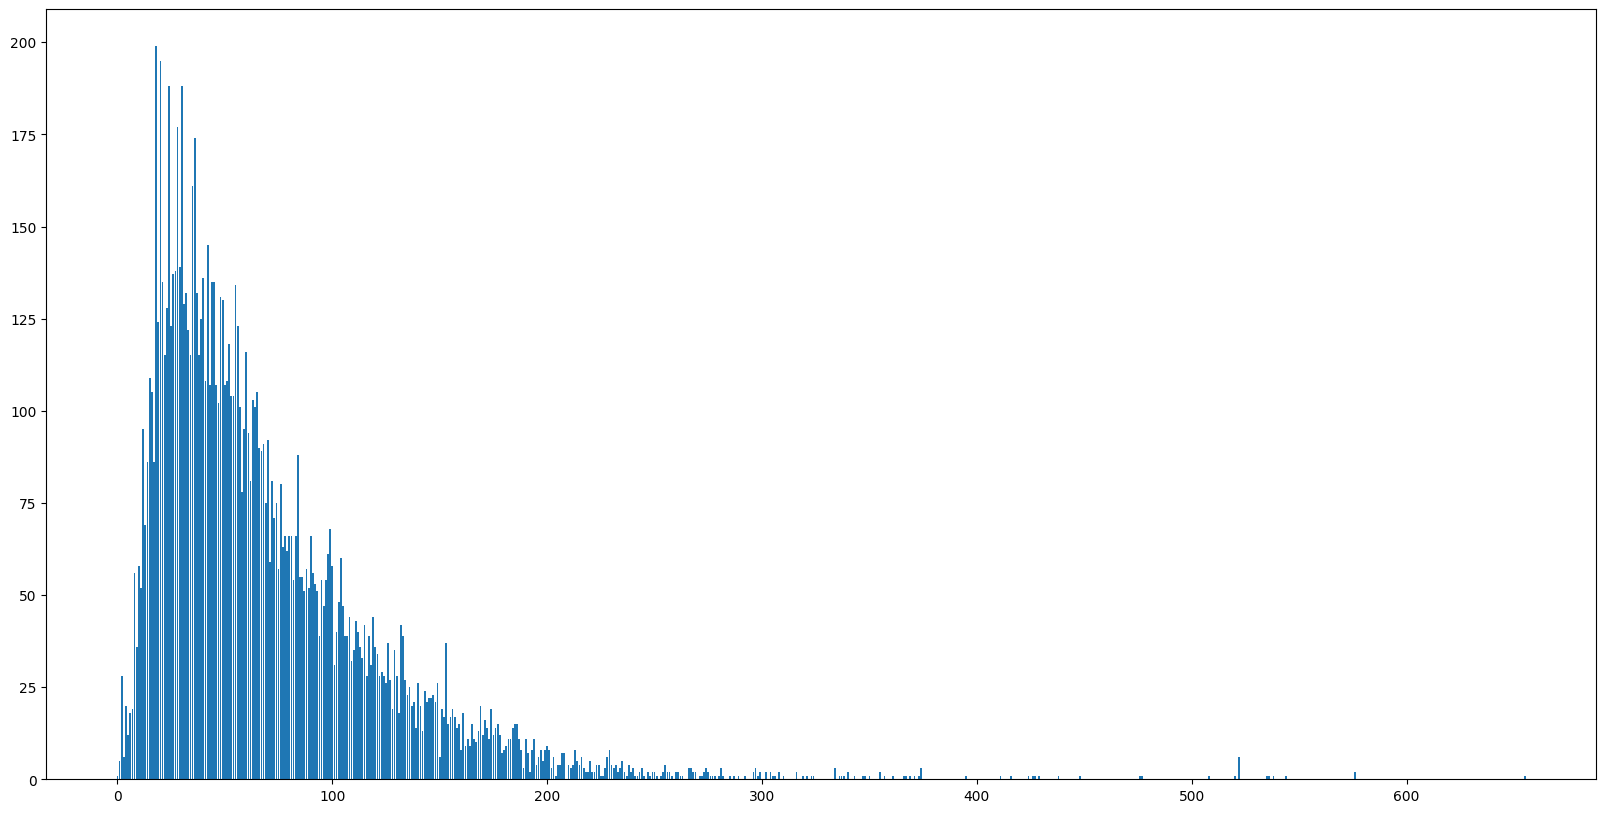

0: 1
1: 5
2: 28
3: 6
4: 20
5: 12
6: 18
7: 19
8: 56
9: 36
10: 58
11: 52
12: 95
13: 69
14: 86
15: 109
16: 105
17: 86
18: 199
19: 124
20: 195
21: 135
22: 115
23: 128
24: 188
25: 123
26: 137
27: 138
28: 177
29: 139
30: 188
31: 129
32: 132
33: 122
34: 115
35: 161
36: 174
37: 132
38: 115
39: 125
40: 136
41: 108
42: 145
43: 107
44: 135
45: 135
46: 107
47: 102
48: 131
49: 130
50: 107
51: 108
52: 118
53: 104
54: 104
55: 134
56: 123
57: 101
58: 78
59: 95
60: 116
61: 94
62: 81
63: 103
64: 101
65: 105
66: 90
67: 89
68: 91
69: 75
70: 92
71: 59
72: 81
73: 71
74: 75
75: 57
76: 80
77: 63
78: 66
79: 62
80: 66
81: 66
82: 54
83: 66
84: 88
85: 55
86: 55
87: 51
88: 57
89: 52
90: 66
91: 56
92: 53
93: 51
94: 39
95: 54
96: 47
97: 54
98: 61
99: 68
100: 58
101: 31
102: 40
103: 48
104: 60
105: 47
106: 39
107: 39
108: 44
109: 32
110: 35
111: 43
112: 40
113: 36
114: 33
115: 42
116: 28
117: 39
118: 31
119: 44
120: 36
121: 34
122: 28
123: 29
124: 28
125: 26
126: 37
127: 27
128: 19
129: 35
130: 28
131: 18
132: 42
133

In [9]:

plt.figure(figsize=(20, 10))
ordered_line_cnt = sorted(line_cnt.items(), key=lambda x: x[0])
plt.bar(line_cnt.keys(), line_cnt.values())
plt.show()
for k, v in ordered_line_cnt:
    print(f"{k}: {v}")